In [131]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [132]:
#import api_wrapper as wrap
from api_wrapper import alph_api_wrapper as alph 
from api_wrapper import alph_settings

In [133]:
a_s = alph_settings(apikey = "TACZtZi8hd383vPZAVTsyxKLrbSaCdvqK6", site = "https://www.alphavantage.co/query?")

In [186]:
#test case on IBM
function = "TIME_SERIES_INTRADAY_EXTENDED"
ticker_lst = ["IBM", "HPQ"]
interval = "60min"
slice1 = [f"year1month{i}" for i in range(1, 12)] #first three months of intraday data
slice2 = [f"year2month{i}" for i in range(1, 12)]
outputsize = "compact"
test = alph.intraday_url(a_s, function, ticker_lst, interval, slice = slice1+slice2, outputsize = outputsize)

# ibm_url = test["IBM"][0]
# ibm_obj = alph.get_csv_data(ibm_url, pretty_print = False)

# hp_url = test["HPQ"][0]
# hp_obj = alph.get_csv_data(hp_url, pretty_print = False)

In [203]:
# # ibm_url = []
# for url in range(11,16):
#     ibm_obj = alph.get_csv_data(test['IBM'][url], pretty_print = False)
#     ibm_url += ibm_obj
    
    
# hp_url = []
for url in range(11,16):
    hp_obj = alph.get_csv_data(test['HPQ'][url], pretty_print = False)
    hp_url += hp_obj

4146

In [167]:
mth = len(test_obj)/3 #per month 
day = mth/30 #per day
t_hr = day/8 #per trading hour
print(mth, day, t_hr)

82.33333333333333 2.7444444444444445 0.34305555555555556


In [213]:
import pandas as pd 
ibm_df = pd.DataFrame(ibm_url[1:], columns = ['time', 'open', 'high', 'low', 'close', 'volume'])
hp_df = pd.DataFrame(hp_url[1:], columns = ['time', 'open', 'high', 'low', 'close', 'volume'])

In [214]:
ibm_df.set_index(inplace=True, keys=['time'])
hp_df.set_index(inplace=True, keys=['time'])

In [215]:
ibm_df.sort_index(inplace=True)
hp_df.sort_index(inplace=True)

In [240]:
ibm_df.to_csv('ibm.csv')
hp_df.to_csv('hp.csv')

In [245]:
df = ibm_df.merge(hp_df, how='inner',left_index=True, right_index=True)
df

,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y
time,,,,,,,,,,
2021-05-12 09:00:00,128.929855116,129.379088061,128.73219262,128.750161938,3913,32.23621797,32.23621797,31.9294802432,32.2150338957,3206
2021-05-12 10:00:00,128.65133069,129.513857944,128.561484101,128.723207961,608701,31.977408013,31.986993567,31.498130315,31.5460580848,1353214
2021-05-12 11:00:00,128.73219262,129.334164766,128.444683536,128.687269326,622007,31.5412653078,31.5987786316,31.0955370487,31.191871866,2477910
2021-05-12 12:00:00,128.678284667,128.866962504,127.936511229,127.99994292,719495,31.1913925883,31.2009781422,30.8271415378,30.8606909766,1503722
2021-05-12 13:00:00,127.995450591,128.098774168,127.330585833,127.51926367,629802,30.8654837536,30.8894476385,30.7217004442,30.7983848759,1092725
...,...,...,...,...,...,...,...,...,...,...
2022-09-02 14:00:00,129.03,129.03,127.6,127.72,382680,27.663476663,27.668430724,27.3563248806,27.3910033076,1355285
2022-09-02 15:00:00,127.7,128.23,127.7,127.84,315796,27.3860492466,27.5396251378,27.3588019111,27.4009114296,1087539
2022-09-02 16:00:00,127.8,128.29,127.24,127.83,716317,27.3959573686,27.5247629548,27.2770599044,27.3959573686,2532997


In [249]:
df['spread'] = df['close_x'].astype('float64') - df['close_y'].astype('float64')
data = df[['spread', 'volume_x','volume_y']]
data['volume_x'] = data['volume_x'].astype('float64')
data['volume_y'] = data['volume_y'].astype('float64')
data

<ipython-input-249-7f30fd33d101>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volume_x'] = data['volume_x'].astype('float64')
<ipython-input-249-7f30fd33d101>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['volume_y'] = data['volume_y'].astype('float64')


,spread,volume_x,volume_y
time,,,
2021-05-12 09:00:00,96.535128,3913.0,3206.0
2021-05-12 10:00:00,97.177150,608701.0,1353214.0
2021-05-12 11:00:00,97.495397,622007.0,2477910.0
2021-05-12 12:00:00,97.139252,719495.0,1503722.0
2021-05-12 13:00:00,96.720879,629802.0,1092725.0
...,...,...,...
2022-09-02 14:00:00,100.328997,382680.0,1355285.0
2022-09-02 15:00:00,100.439089,315796.0,1087539.0
2022-09-02 16:00:00,100.434043,716317.0,2532997.0


In [247]:
# data = pd.DataFrame()
# data['time'] = ibm_df['time']
# data['ibm_vol'] = ibm_df['volume'].astype('float64')
# data['hp_vol'] = hp_df['volume'].astype('float64')
# data['spread'] = ibm_df['close'].astype('float64') - hp_df['close'].astype('float64')
# data['spread_high'] = ibm_df['high'].astype('float64') - hp_df['high'].astype('float64')
# data.sort_values('time', axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last', ignore_index=False)
# data.reset_index(inplace= True)
# data = data[['time','ibm_vol','hp_vol','spread','spread_high']]
# data

In [250]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,spread,volume_x,volume_y
spread,1.000000,-0.064581,-0.093898
volume_x,-0.064581,1.000000,0.499352
volume_y,-0.093898,0.499352,1.000000


In [251]:
data.dropna(inplace = True)

<ipython-input-251-48a623a66630>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [252]:
import numpy as np
def gen_labels(df,t,threshold):
    # Calculate % return on spread t hours later
    df['forward_return'] = df['spread'].diff(periods=t)/df['spread']
    
    #If the return is more than x%, we should have bought, and hence the label is (1)
    #If return is less than x%, we should have sold, and hence label is (-1)
    #If in between, do nothing (0)
    df['output'] = np.select([df['forward_return'] > threshold ,df['forward_return'] < -threshold],[1,-1])
    return df

data = gen_labels(data,t=24,threshold=0.02)

<ipython-input-252-c0211c1ea33f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forward_return'] = df['spread'].diff(periods=t)/df['spread']
<ipython-input-252-c0211c1ea33f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output'] = np.select([df['forward_return'] > threshold ,df['forward_return'] < -threshold],[1,-1])


In [253]:
split = round(0.8*len(data))
train, test = data[:split],data[split:]

In [254]:
x_train = train[['spread','volume_x','volume_y']]
y_train = train[['output']]

x_test = test[['spread','volume_x','volume_y']]
y_test = test[['output']]


In [256]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100, 120],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# model = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   53.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed: 20.1min finished
C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [261]:
model = RandomForestClassifier(bootstrap= True,
                             max_depth= 80,
                             max_features= 2,
                             min_samples_leaf= 5,
                             min_samples_split= 10,
                             n_estimators=100,
                             random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

<ipython-input-261-41d01a4a4233>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


In [262]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.85      0.22      0.34       102
           0       0.70      0.95      0.81       431
           1       0.21      0.07      0.10       117

    accuracy                           0.68       650
   macro avg       0.58      0.41      0.42       650
weighted avg       0.63      0.68      0.61       650



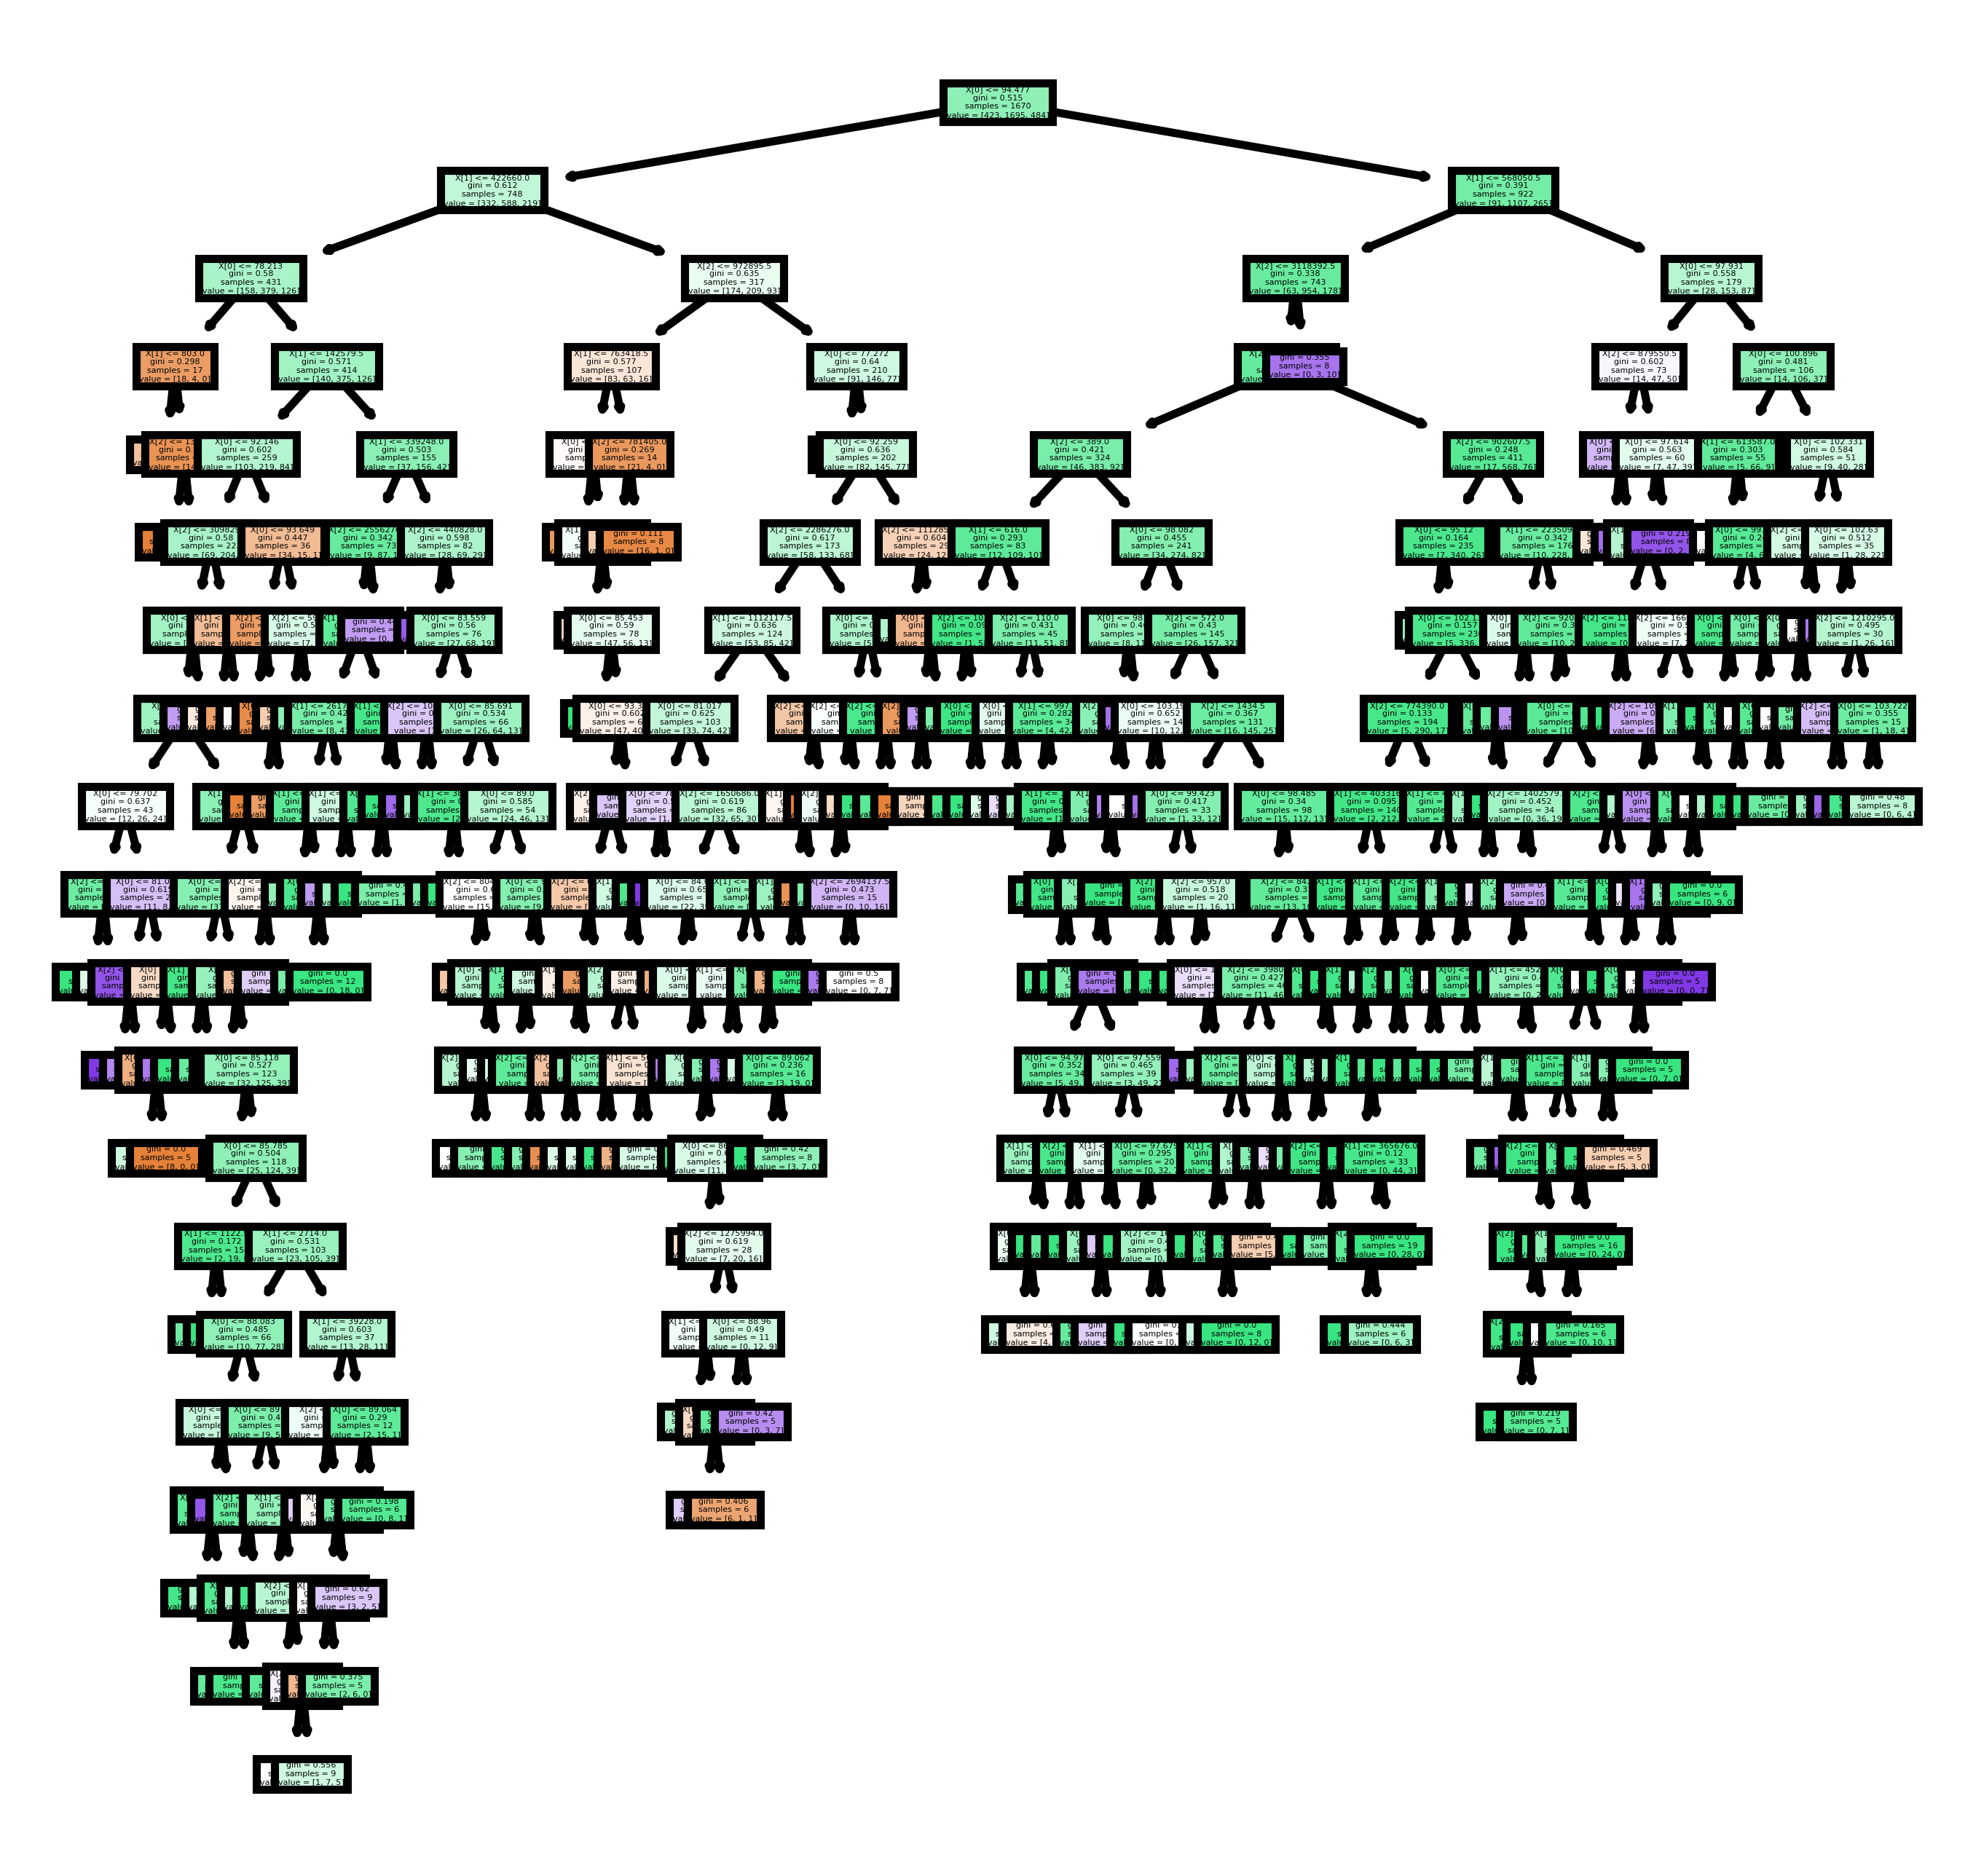

In [263]:
from sklearn import tree
import matplotlib.pyplot as plt

fn = ['time','ibm_vol','hp_vol','spread','spread_high'],
cn = ['1','0','-1'],
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(model.estimators_[0],
#                feature_names = fn, 
#                class_names = cn,
               filled = True);
fig.savefig('rf_individualtree.png')

In [264]:
data.to_csv('spread_ibm_hp.csv')